In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# # Interactive plots
# %matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

timer = mypackage.utils.Timer()

TensorFlow version is 2.1.0


Using TensorFlow backend.


In [2]:
def split_for_zoom(x, y):
    def split_in_four(array, img):
        s, c = 32, 50
        array.append(img[c-s:c, c-s:c])
        array.append(img[c:c+s, c-s:c])
        array.append(img[c:c+s, c:c+s])
        array.append(img[c-s:c, c:c+s])
    X, Y = [], []
    split_in_four(X, x)
    split_in_four(Y, y)
    
    return np.array(X), np.array(Y)

def undo_one_image_split(Y):
    s, c = 32, 50
    Y = np.squeeze(Y)
    img = np.zeros((100, 100))
    img[c-s:c, c-s:c] = Y[0]
    img[c:c+s, c-s:c] = Y[1]
    img[c:c+s, c:c+s] = Y[2]
    img[c-s:c, c:c+s] = Y[3]
    return img

# x, y = split_for_zoom(X[0], Y[0])

# plt.figure()
# plt.imshow(np.squeeze(undo_one_image_split(y)))

# for i in range(len(x)):
#     plt.figure()
#     plt.imshow(np.squeeze(y[i]))
# x.shape, y.shape

In [3]:
# First load the labeled data and train on it
X, Y, info = mypackage.Dataset.load("data/tomra_all", only_with_contaminant=True)
_, X, _ = mypackage.Dataset.scale(None, X, scaler='GlobalStandardization')

print(X.shape, (X.min(), X.max()))
print(np.unique(Y, return_counts=True))

(65, 100, 100, 208) (-7.217623, 11.974456)
(array([0, 1, 2], dtype=int32), array([554285,  88543,   7172]))


Start training for 0 - 20200213_115449_FM_fillet_repeat_sample_B_20
Elapsed time: 431.5716 seconds


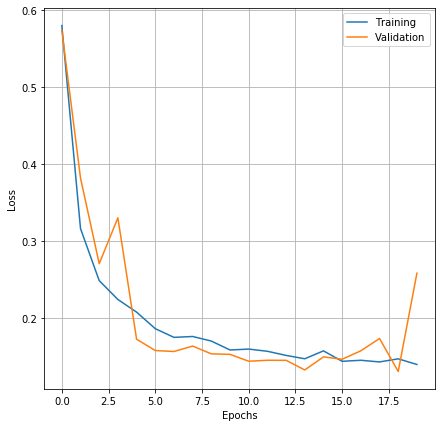

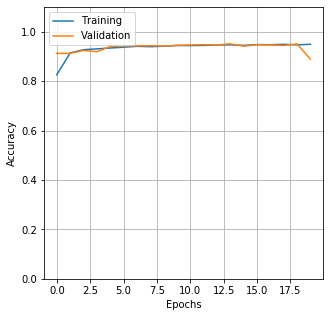

Predicting for train data
Elapsed time: 5.7759 seconds
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    110844
           1       0.97      0.98      0.97    305174
           2       0.91      0.82      0.86     42734

    accuracy                           0.96    458752
   macro avg       0.95      0.92      0.93    458752
weighted avg       0.96      0.96      0.96    458752



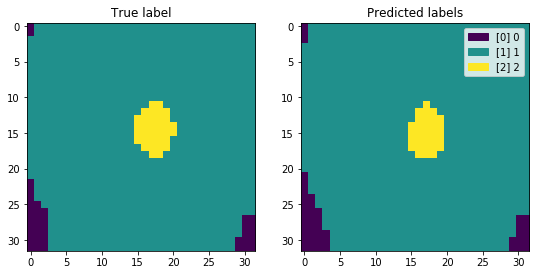

Predicting for test data
Elapsed time: 0.2933 seconds
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3258
           1       0.76      0.87      0.81       591
           2       0.81      0.34      0.48       247

    accuracy                           0.94      4096
   macro avg       0.85      0.74      0.76      4096
weighted avg       0.94      0.94      0.93      4096

Elapsed time: 0.3347 seconds


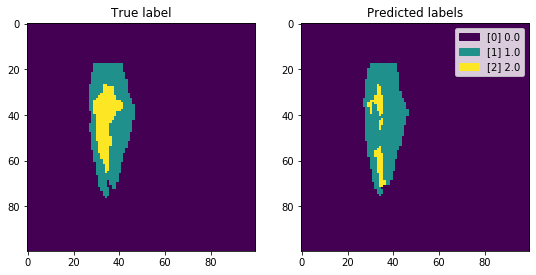

Start training for 23 - 20200213_121142_new_FM_fillet_sample_C_26
Elapsed time: 432.1838 seconds


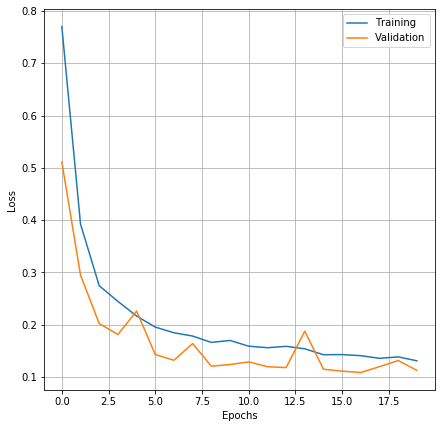

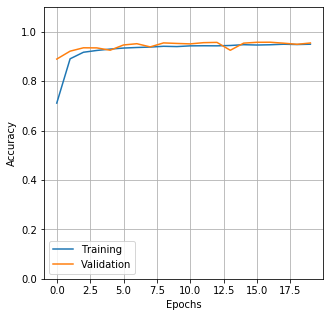

Predicting for train data
Elapsed time: 5.7594 seconds
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    117463
           1       0.96      0.98      0.97    297434
           2       0.92      0.79      0.85     43855

    accuracy                           0.96    458752
   macro avg       0.95      0.91      0.93    458752
weighted avg       0.96      0.96      0.96    458752



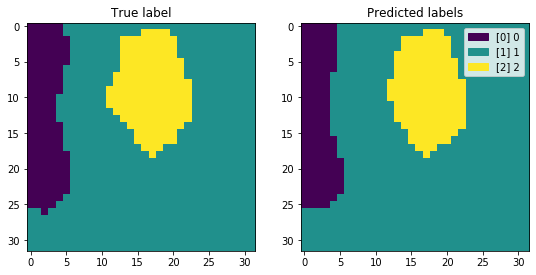

Predicting for test data
Elapsed time: 0.2905 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2989
           1       0.92      0.96      0.94       945
           2       0.74      0.65      0.70       162

    accuracy                           0.97      4096
   macro avg       0.88      0.87      0.88      4096
weighted avg       0.97      0.97      0.97      4096

Elapsed time: 0.3305 seconds


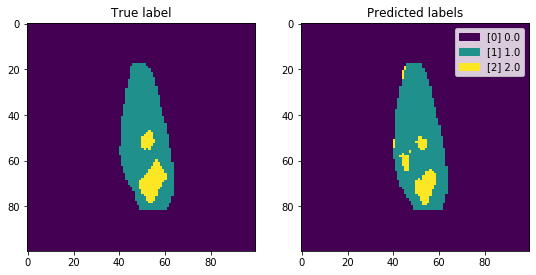

Start training for 24 - fillet_FM_10
Elapsed time: 431.4843 seconds


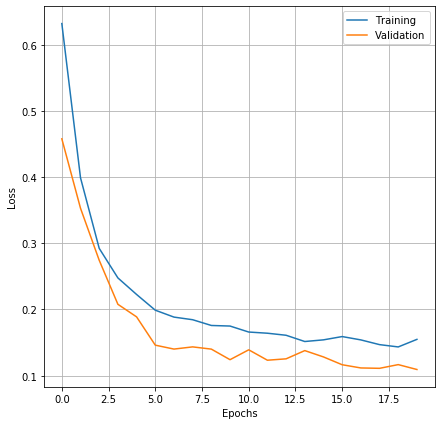

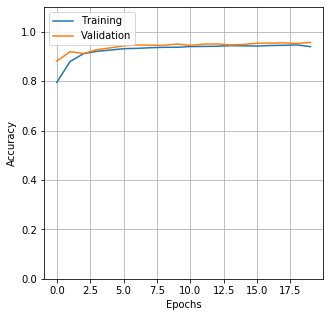

Predicting for train data
Elapsed time: 5.7729 seconds
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    127859
           1       0.97      0.97      0.97    287534
           2       0.88      0.83      0.86     43359

    accuracy                           0.96    458752
   macro avg       0.94      0.93      0.93    458752
weighted avg       0.96      0.96      0.96    458752



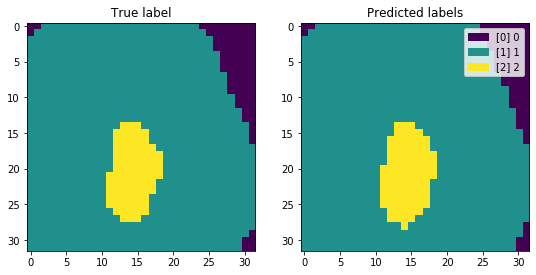

Predicting for test data
Elapsed time: 0.2914 seconds
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2968
           1       0.96      0.90      0.93      1044
           2       0.39      0.75      0.51        84

    accuracy                           0.96      4096
   macro avg       0.78      0.88      0.81      4096
weighted avg       0.97      0.96      0.97      4096

Elapsed time: 0.3314 seconds


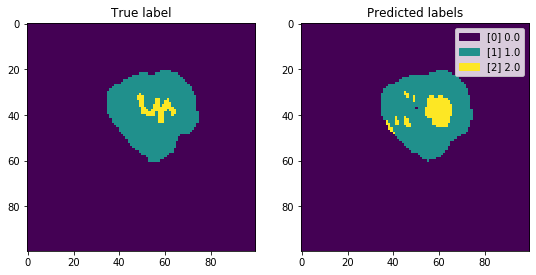

Start training for 31 - 20200213_114922_skinside_sample_B_21
Elapsed time: 431.8354 seconds


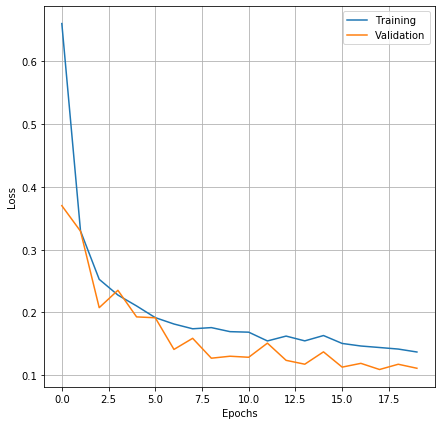

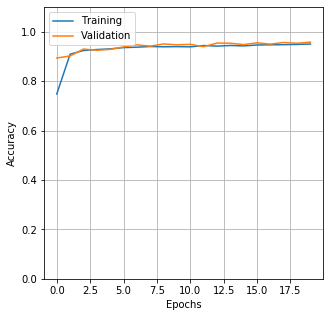

Predicting for train data
Elapsed time: 5.7756 seconds
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    125221
           1       0.97      0.98      0.97    290033
           2       0.90      0.82      0.86     43498

    accuracy                           0.96    458752
   macro avg       0.94      0.92      0.93    458752
weighted avg       0.96      0.96      0.96    458752



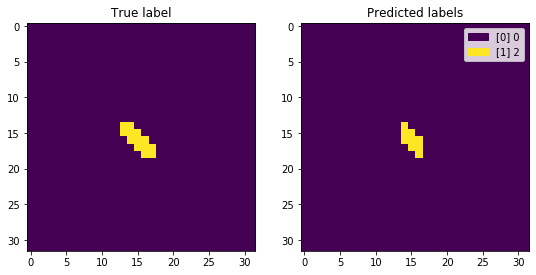

Predicting for test data
Elapsed time: 0.2895 seconds
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2191
           1       0.94      0.92      0.93      1793
           2       0.03      0.03      0.03       112

    accuracy                           0.93      4096
   macro avg       0.65      0.64      0.65      4096
weighted avg       0.93      0.93      0.93      4096

Elapsed time: 0.3296 seconds


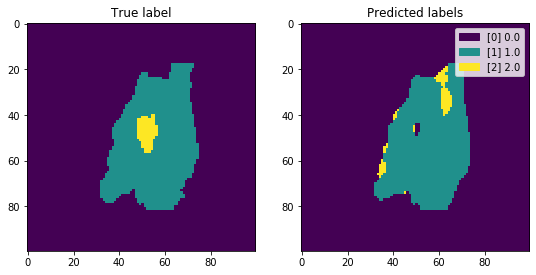

Start training for 35 - 20200213_114648_fillet_sample49
Elapsed time: 432.3210 seconds


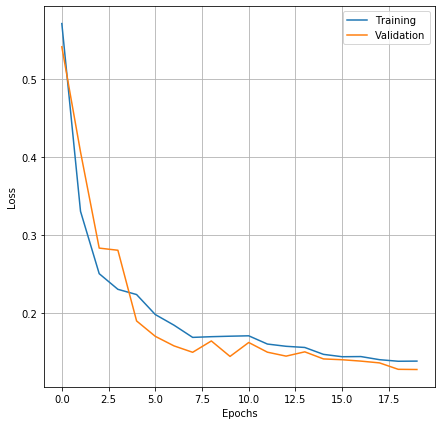

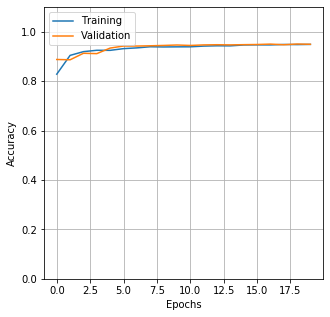

Predicting for train data
Elapsed time: 5.7631 seconds
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    127625
           1       0.97      0.97      0.97    289264
           2       0.85      0.84      0.85     41863

    accuracy                           0.96    458752
   macro avg       0.93      0.93      0.93    458752
weighted avg       0.96      0.96      0.96    458752



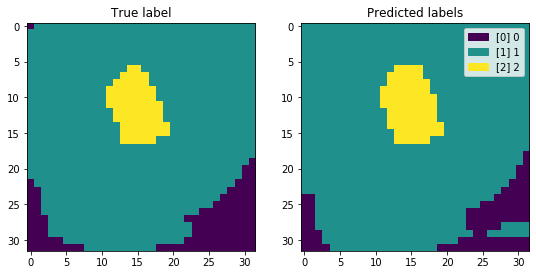

Predicting for test data
Elapsed time: 0.2903 seconds
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2388
           1       0.96      0.95      0.95      1560
           2       0.46      0.74      0.57       148

    accuracy                           0.95      4096
   macro avg       0.81      0.89      0.83      4096
weighted avg       0.96      0.95      0.96      4096

Elapsed time: 0.3305 seconds


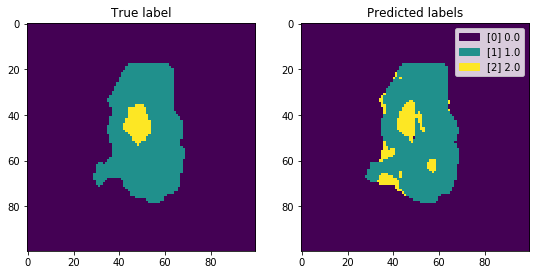

Start training for 57 - 20200213_114611_fillet_sample47
Elapsed time: 432.8296 seconds


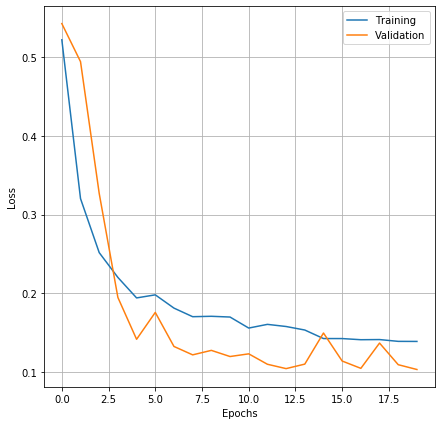

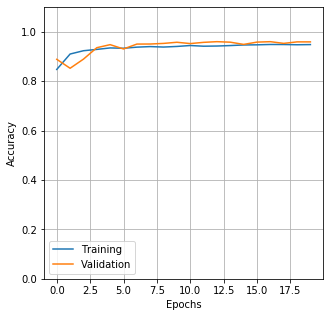

Predicting for train data
Elapsed time: 5.7776 seconds
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    123733
           1       0.98      0.96      0.97    293449
           2       0.82      0.88      0.85     41570

    accuracy                           0.96    458752
   macro avg       0.92      0.94      0.93    458752
weighted avg       0.96      0.96      0.96    458752



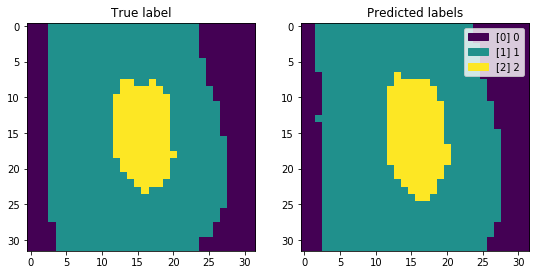

Predicting for test data
Elapsed time: 0.2913 seconds
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2118
           1       0.95      0.87      0.91      1833
           2       0.65      0.79      0.72       145

    accuracy                           0.92      4096
   macro avg       0.84      0.88      0.86      4096
weighted avg       0.92      0.92      0.92      4096

Elapsed time: 0.3320 seconds


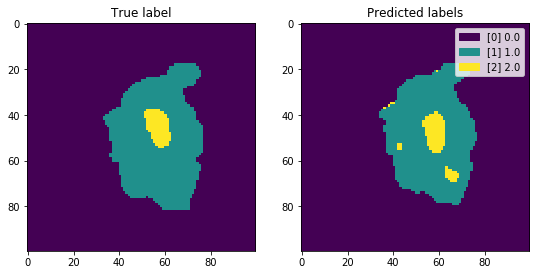

Start training for 63 - 20200213_114807_fillet_sample50
Elapsed time: 431.7384 seconds


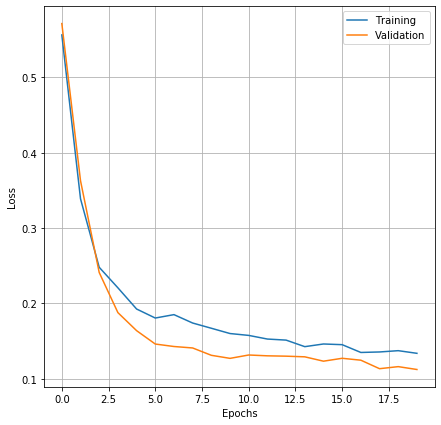

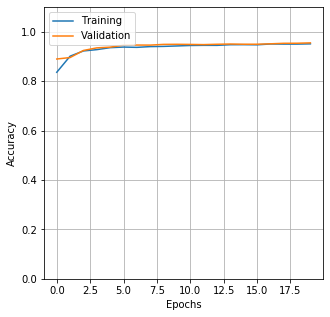

Predicting for train data
Elapsed time: 5.7598 seconds
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    117723
           1       0.96      0.99      0.97    299652
           2       0.93      0.79      0.85     41377

    accuracy                           0.96    458752
   macro avg       0.95      0.91      0.93    458752
weighted avg       0.96      0.96      0.96    458752



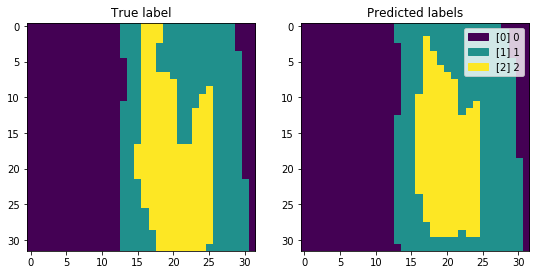

Predicting for test data
Elapsed time: 0.2949 seconds
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2290
           1       0.96      0.98      0.97      1733
           2       0.39      0.19      0.26        73

    accuracy                           0.97      4096
   macro avg       0.78      0.72      0.74      4096
weighted avg       0.97      0.97      0.97      4096

Elapsed time: 0.3361 seconds


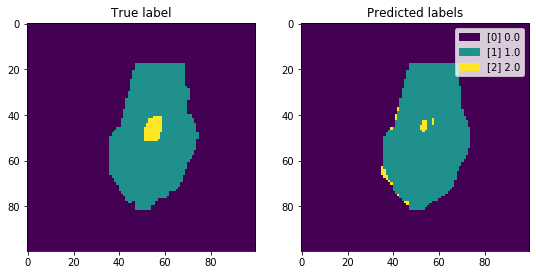

In [4]:
def select_one(X, i):
    return X[np.arange(len(X)) != i], X[i]

# i = 0
for i in [0, 23, 24, 31, 35, 57, 63]: # range(len(X))
#     Do CV on each image / Or on each set of 10 images

    X_rest, x_validation = select_one(X, i)
    Y_rest, y_validation = select_one(Y, i)
    X_train, Y_train = mypackage.Dataset.make_zoomed_in_dataset(X_rest, Y_rest, size=32, sample_multiplication=7, contaminant_type=2)
    
    unet = mypackage.MyUnet.UNet(X_train, Y_train, dropout=0.5)
    print(f"Start training for {i} - {info[i]}")
    timer.start()
    unet.train(batch_size=5, epochs=20, validation_split=0.1, clear_output=False, monitor='val_loss', mode='min', verbose=0)
    timer.stop()
    unet.plot_training_results()

    print("Predicting for train data")
    unet.predict(X_train, Y_labels=Y_train, plot=True)

    x, y = split_for_zoom(x_validation, y_validation)
    print("Predicting for test data")
    timer.start()
    y_hat = unet.predict(x, Y_labels=y, plot=False);
    timer.stop()

    # Plot results
    plt.figure(figsize=(9, 5))
    plt.subplot(121)
    plt.imshow(undo_one_image_split(y))
    plt.title("True label")

    plt.subplot(122)
    img = plt.imshow(undo_one_image_split(y_hat))
    mypackage.Dataset._Dataset__add_legend_to_image(undo_one_image_split(y_hat), img)
    plt.title("Predicted labels")
    plt.show()

In [5]:
len(info)

67

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



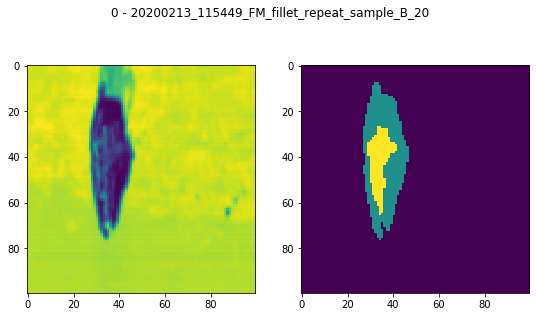

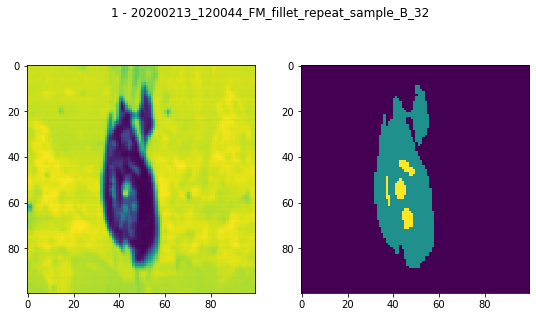

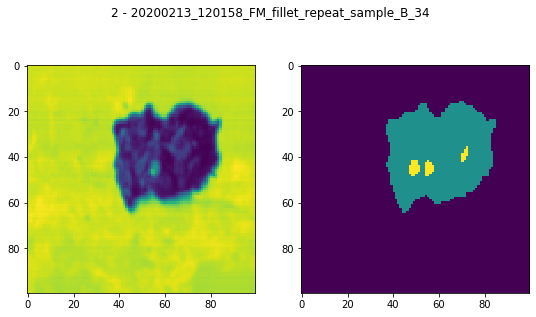

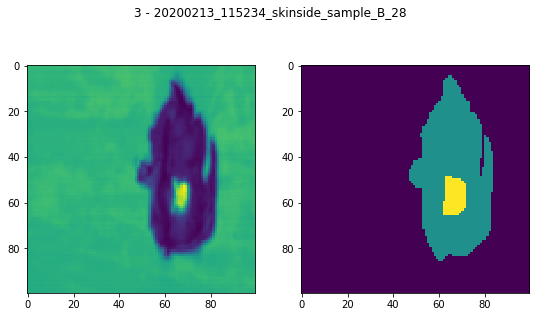

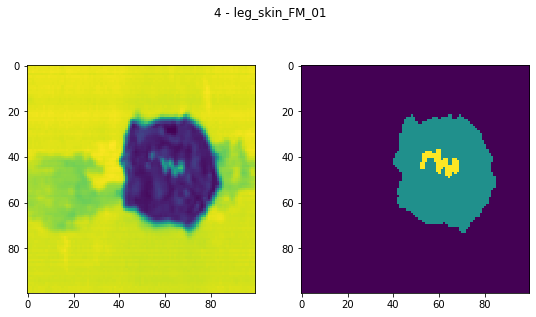

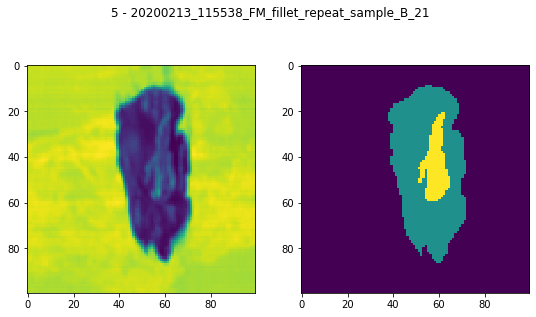

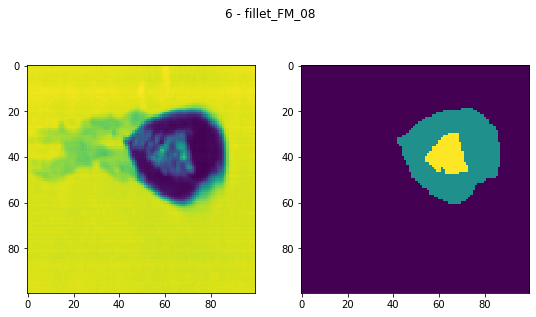

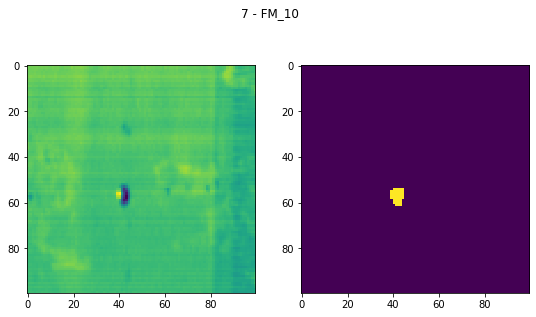

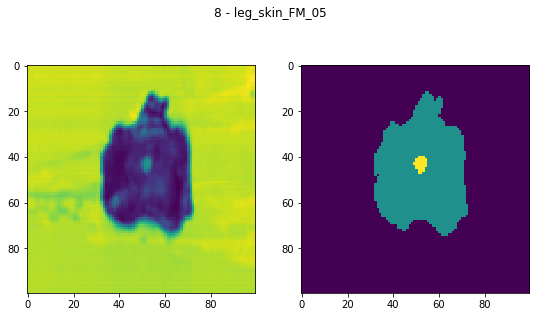

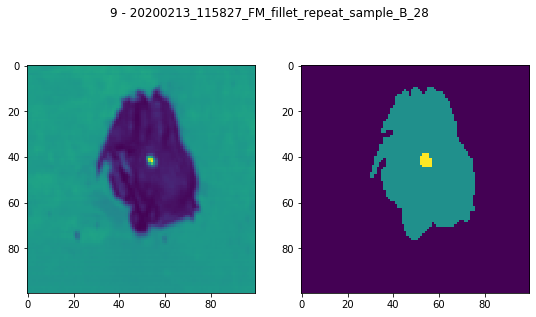

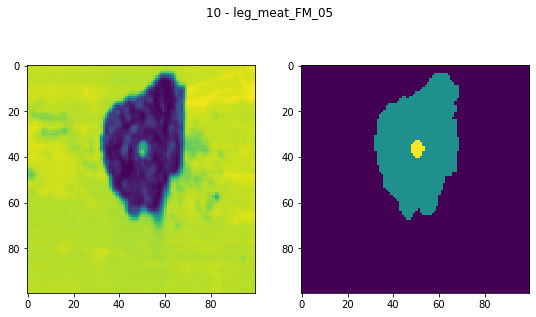

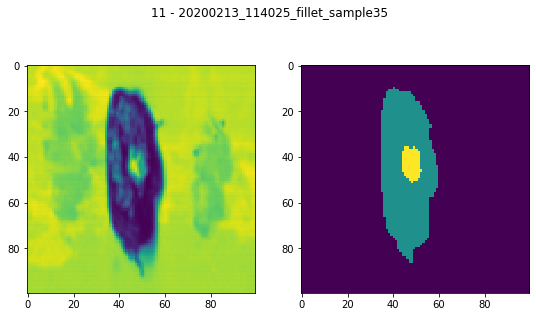

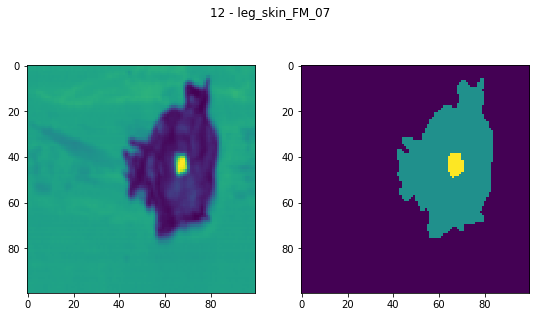

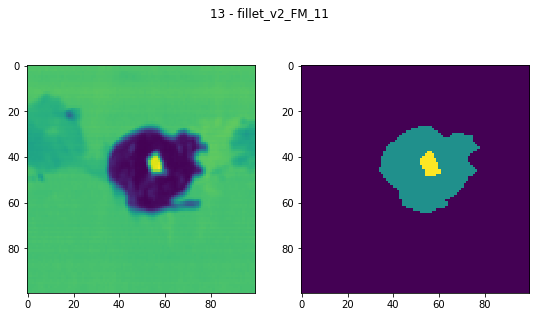

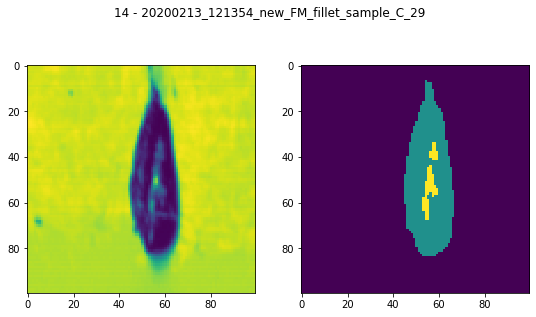

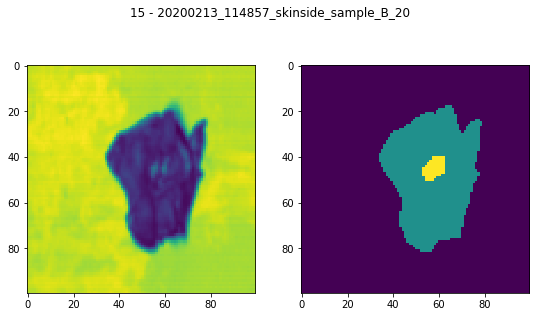

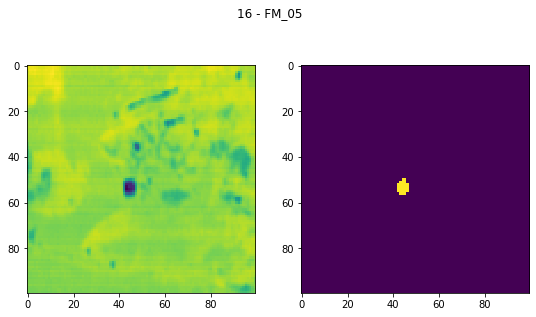

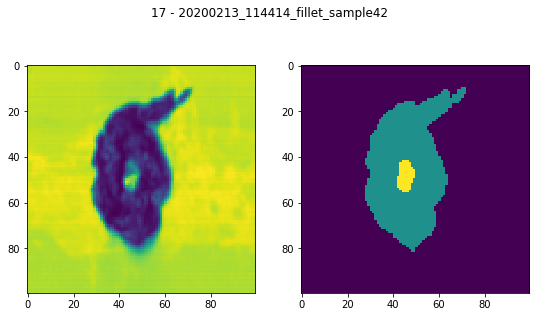

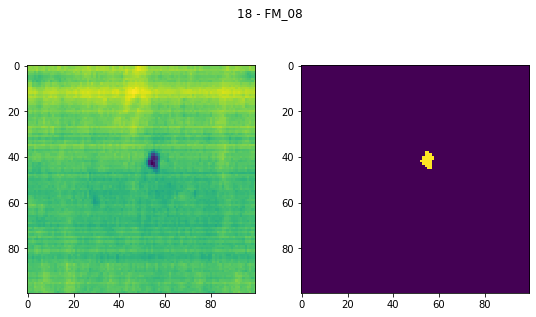

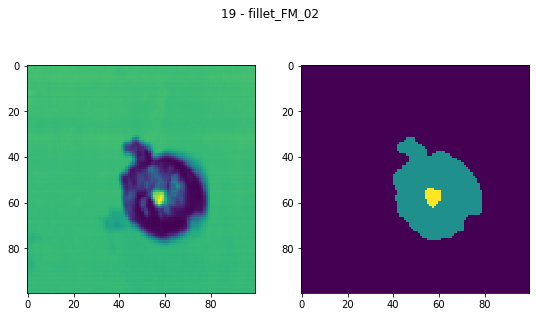

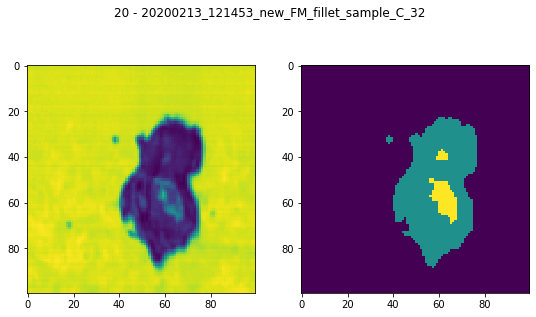

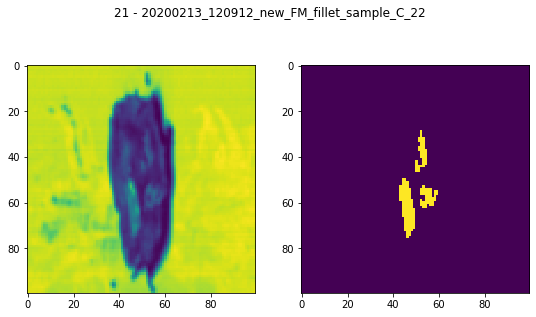

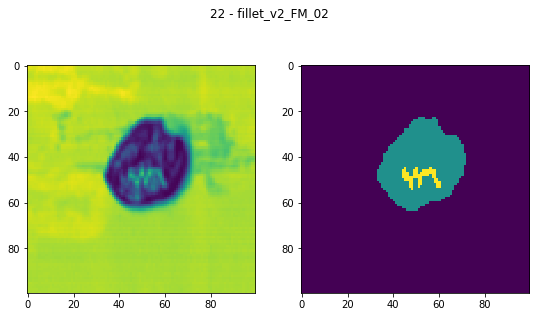

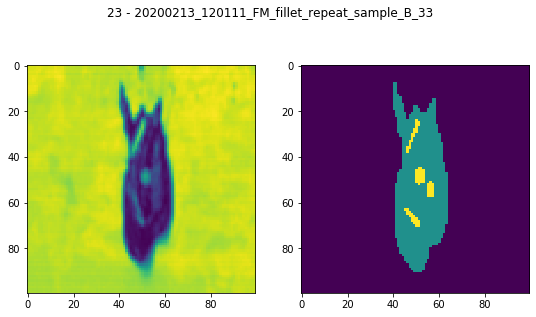

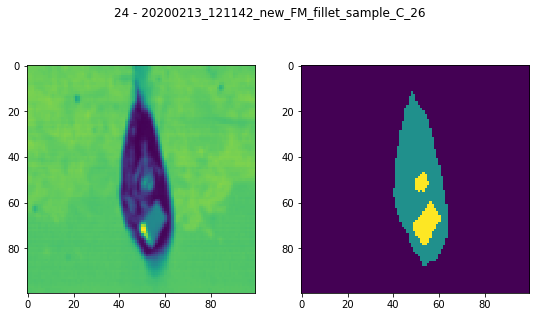

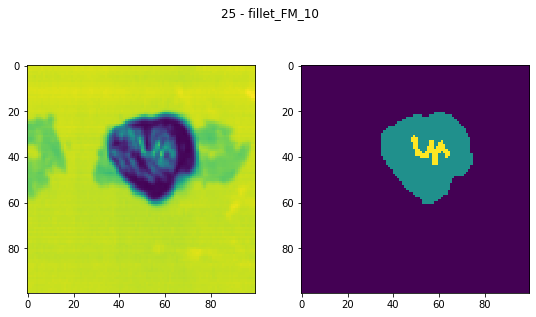

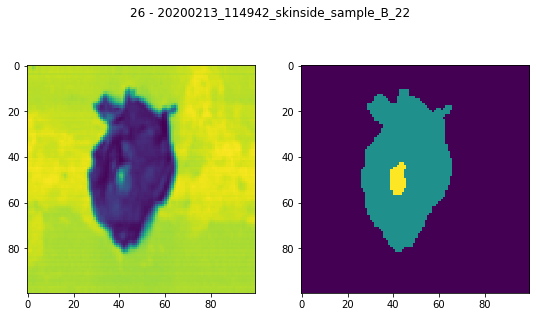

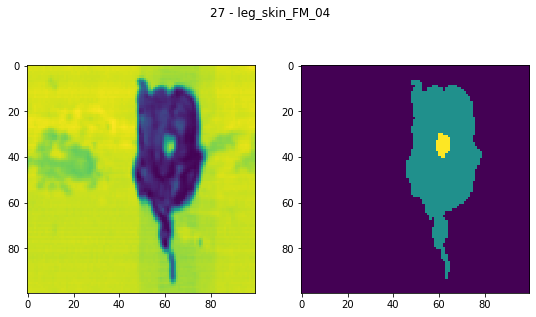

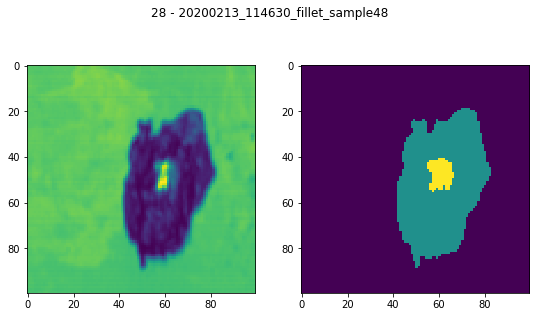

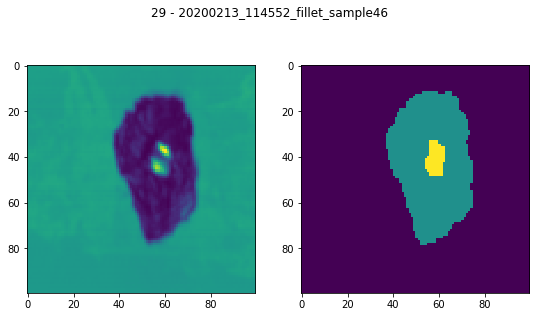

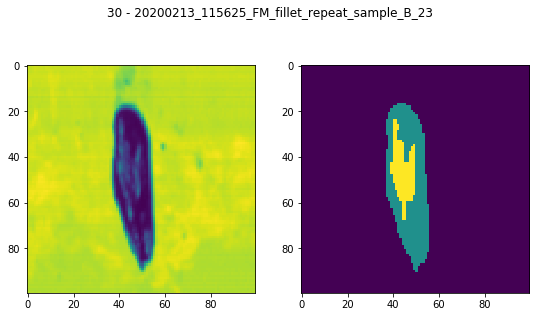

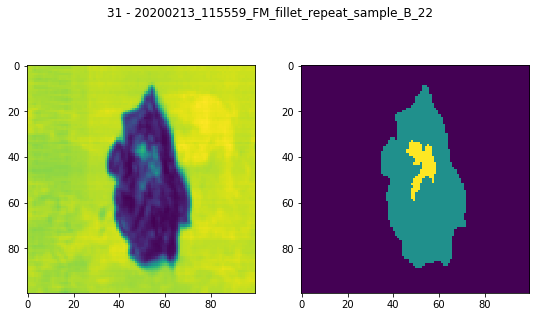

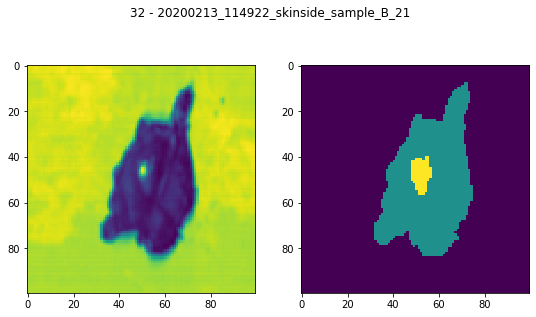

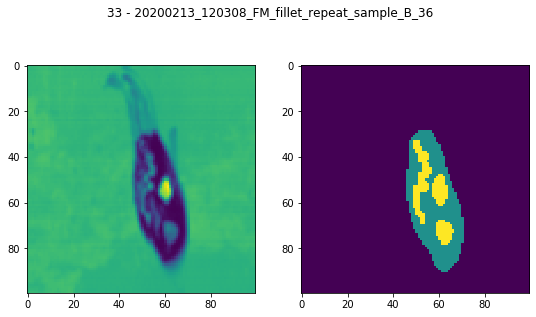

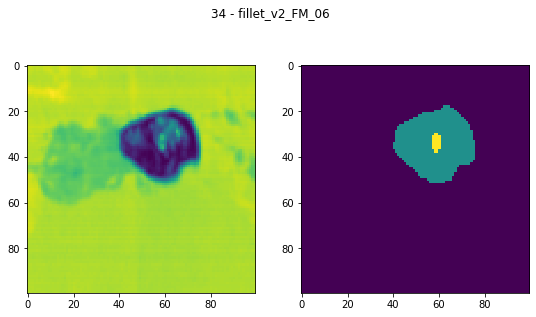

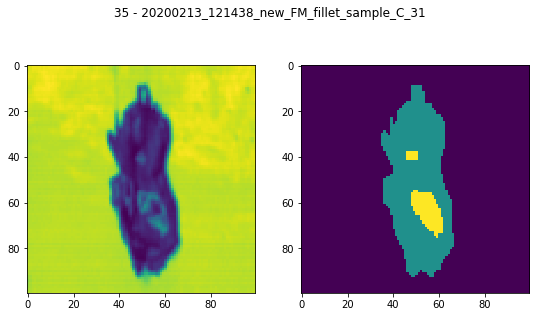

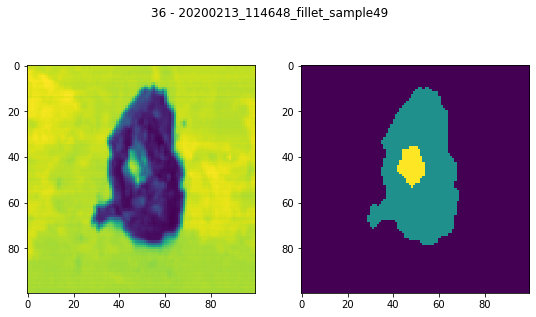

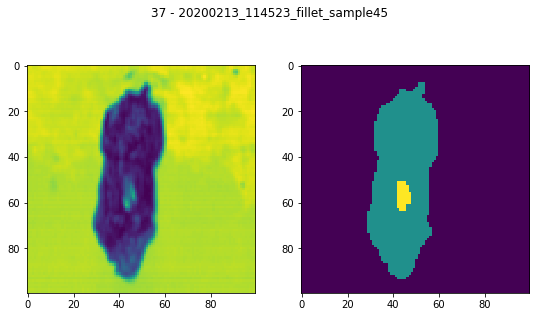

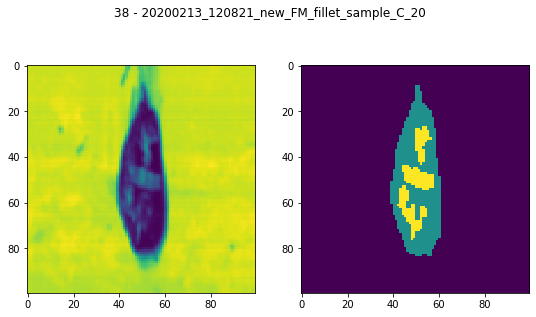

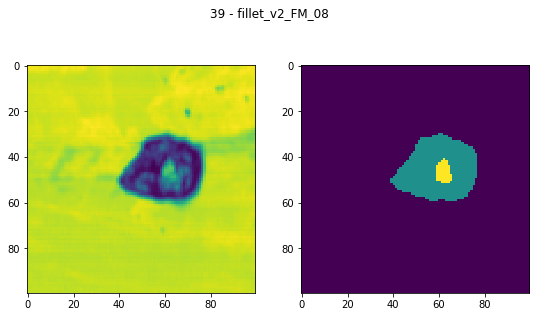

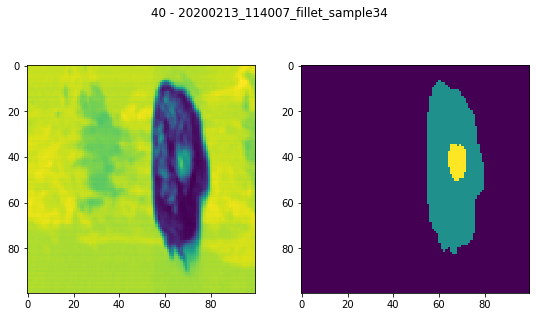

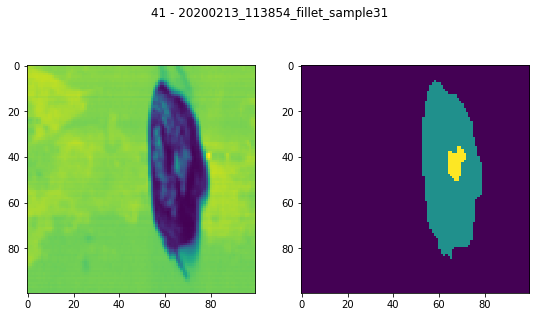

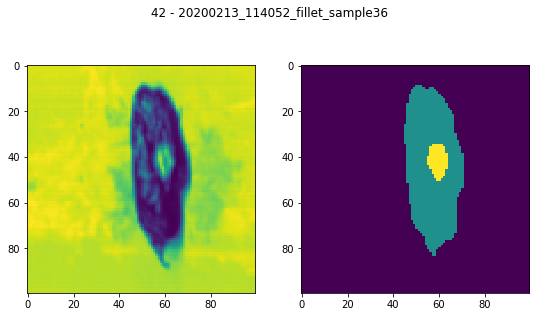

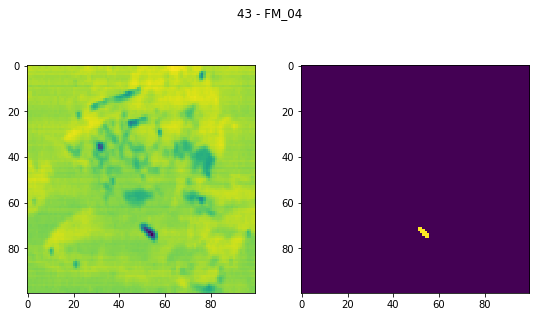

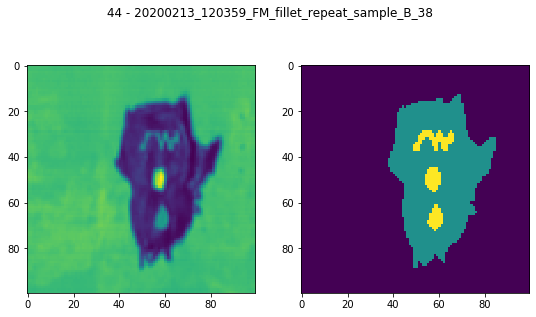

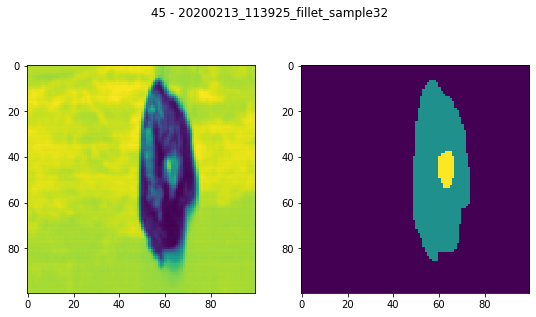

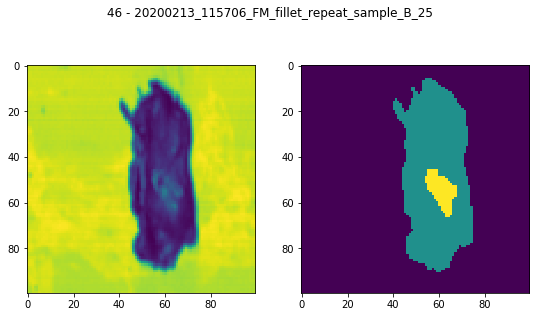

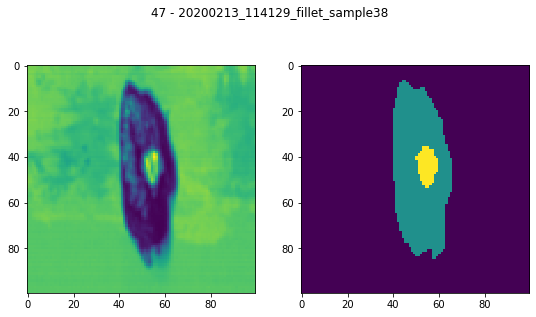

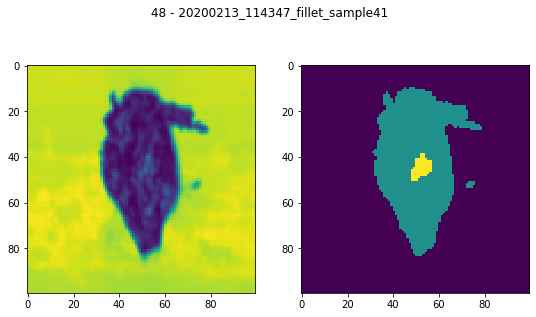

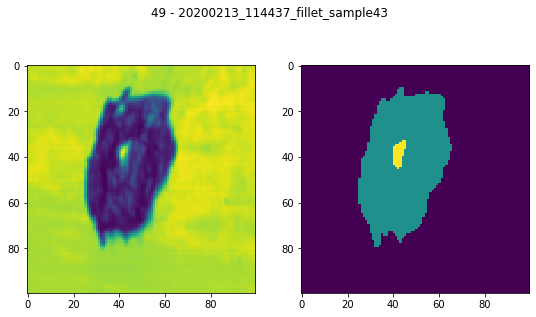

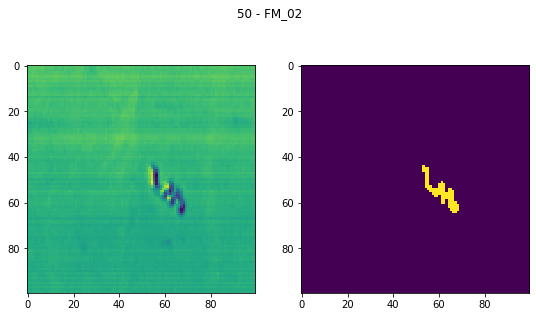

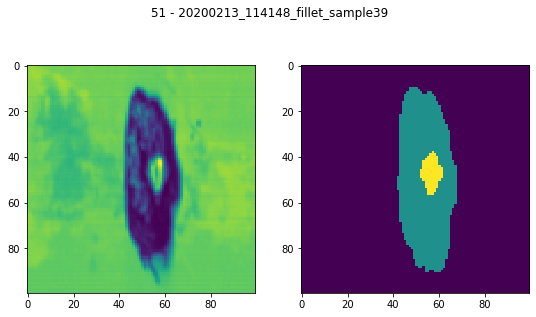

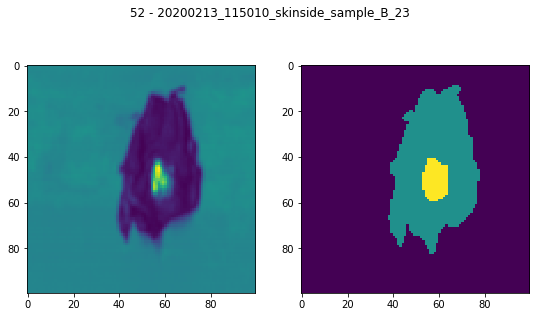

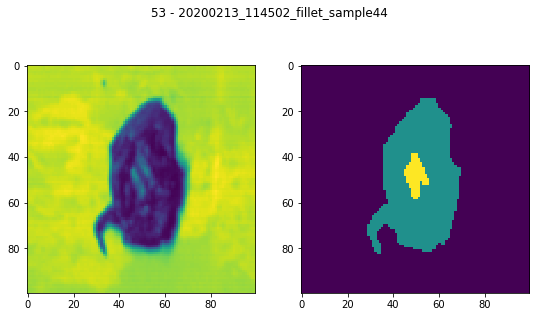

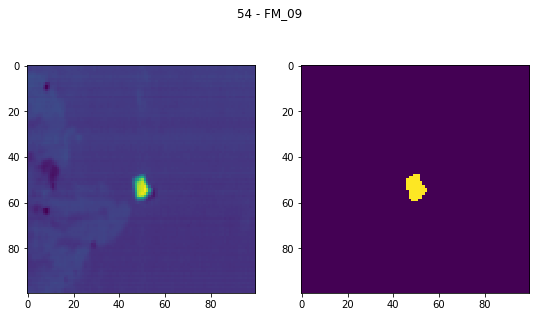

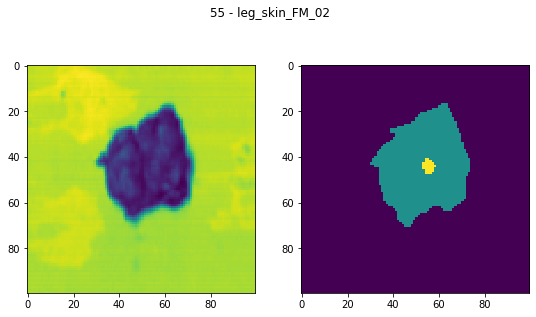

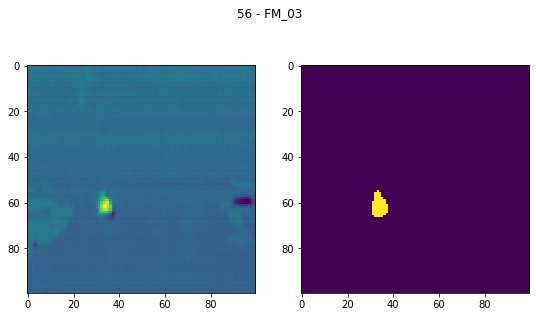

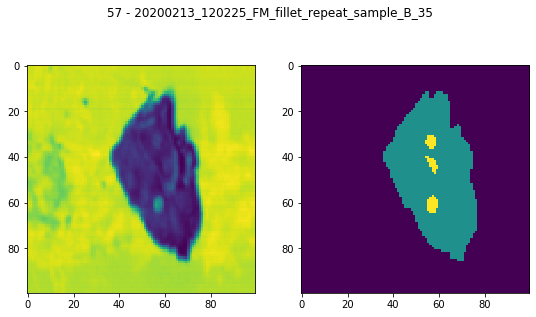

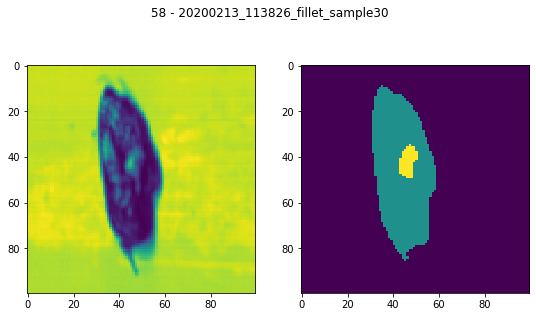

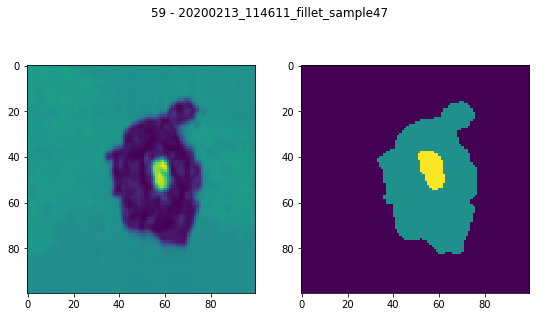

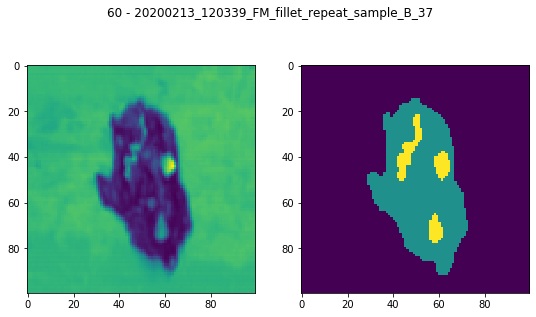

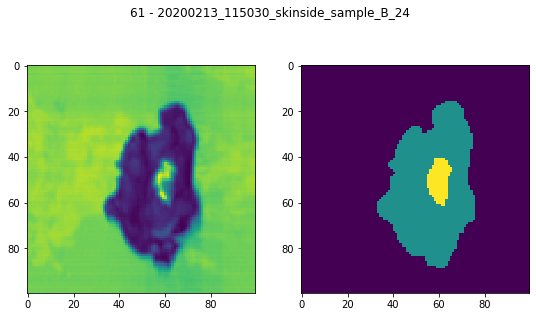

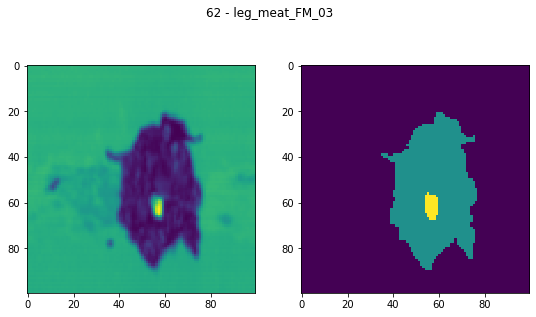

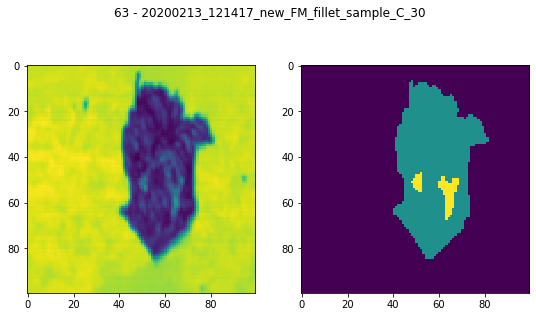

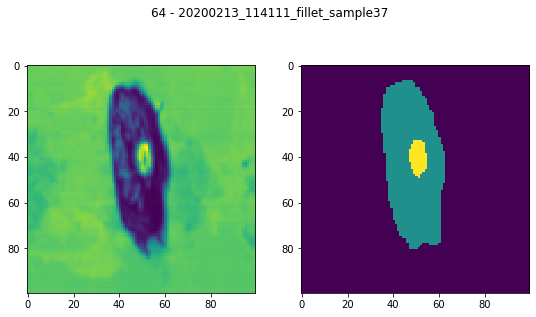

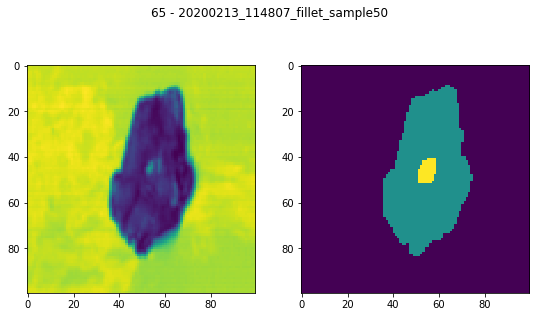

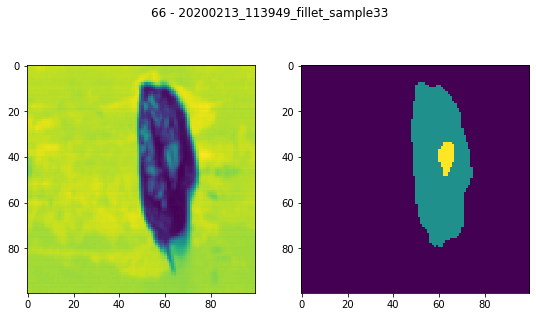

In [36]:
for i, file_name in enumerate(info):
    fig = plt.figure(figsize=(9, 5))
    fig.suptitle(f"{i} - {file_name}")
    plt.subplot(121)
    plt.imshow(X[i, :, :, 138])
    plt.subplot(122)
    plt.imshow(Y[i, :, :, 0])
